In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
'''
Load Json
'''
lta_train_json = "../Annotations/fho_lta_train.json"
lta_val_json = "../Annotations/fho_lta_val.json"
lta_test_json= "../Annotations/fho_lta_test_unannotated.json"
with open(lta_train_json, encoding='utf-8') as f:
    lta_train = json.load(f)
with open(lta_val_json, encoding='utf-8') as f:
    lta_val = json.load(f)
with open(lta_test_json, encoding='utf-8') as f:
    lta_test = json.load(f)



## Number of Atom actions (8s) Bar graph

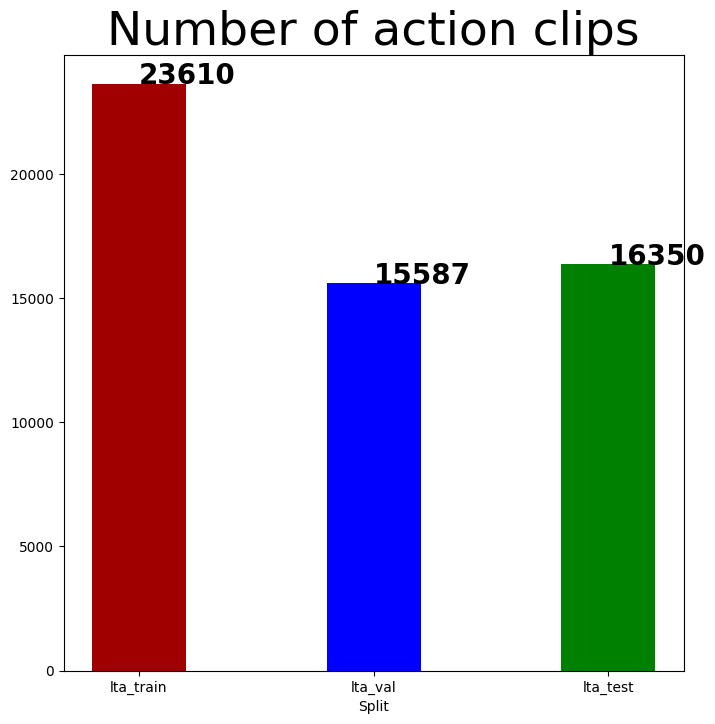

In [4]:
import matplotlib.pyplot as plt

lta_train_clip_num = len(lta_train['clips'])
lta_val_clip_num = len(lta_val['clips'])
lta_test_clip_num = len(lta_test['clips'])

x = ['lta_train', 'lta_val','lta_test']
y = [lta_train_clip_num, lta_val_clip_num,lta_test_clip_num]
plt.figure(figsize=(8,8))
plt.bar(x, y, color=['#A00000', 'blue','green'],width=0.4)
plt.title('Number of action clips',fontsize=34)
plt.xlabel('Split')


for i, v in enumerate(y):
    plt.text(i, v, str(v), color='black', fontweight='bold',fontsize=20)

plt.show()

# Circle Graph

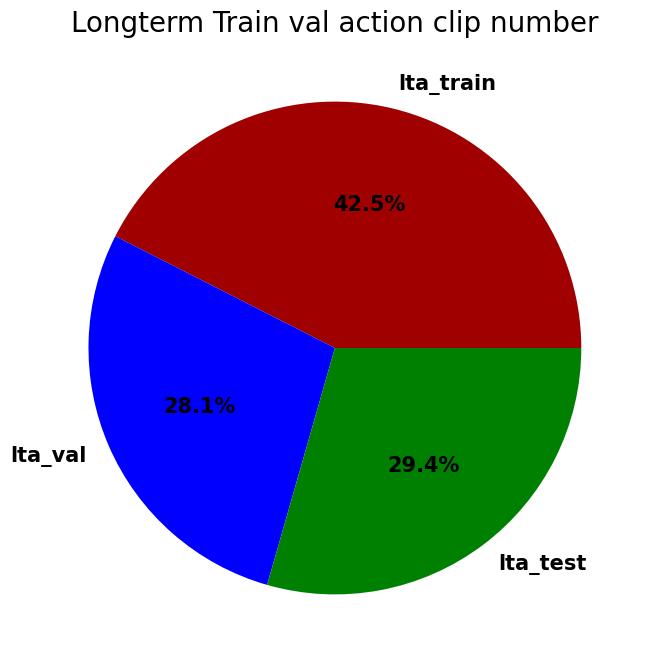

In [5]:
import matplotlib.pyplot as plt

x = ['lta_train', 'lta_val','lta_test']
y = [lta_train_clip_num, lta_val_clip_num,lta_test_clip_num]
plt.figure(figsize=(8,8))
plt.pie(y, labels=x, colors=['#A00000','blue' ,'green'], autopct='%1.1f%%',textprops={'fontsize': 15,'fontweight':'bold'})
plt.title('Longterm Train val action clip number',fontsize=20)
plt.show()

## Action Overlap Distribution

In [5]:
def overlap_time(clip1, clip2):
    start_time1 = clip1['action_clip_start_sec']
    end_time1 = clip1['action_clip_end_sec']
    start_time2 = clip2['action_clip_start_sec']
    end_time2 = clip2['action_clip_end_sec']
    
    overlap_start_time = max(start_time1, start_time2)
    overlap_end_time = min(end_time1, end_time2)
    
    overlap_time = overlap_end_time - overlap_start_time
    if overlap_time < 0:
        overlap_time = 0
    return overlap_time



In [6]:
def overlap_time_all(clips):
    overlap_time_list = []
    for i in range(len(clips)-1):
        value=overlap_time(clips[i], clips[i+1])
        overlap_time_list.append(value)
    return overlap_time_list

In [7]:
def get_overlap_time_in_range(overlap_time_list, start_time, end_time):
    count = 0
    for time in overlap_time_list:
        if time >= start_time and time <= end_time:
            count += 1
    return count


## All overlap Distribution

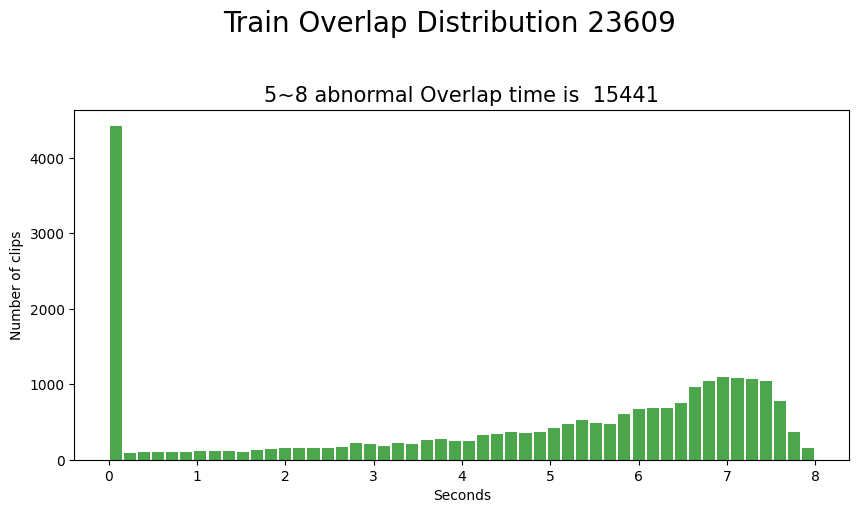

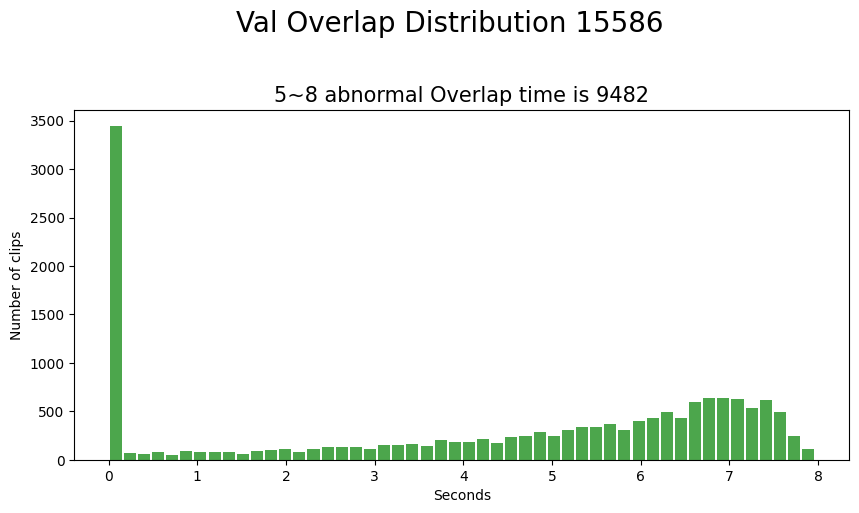

In [8]:
train_overlap_time_list = overlap_time_all(lta_train['clips'])
val_overlap_time_list = overlap_time_all(lta_val['clips'])
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.suptitle(f'Train Overlap Distribution {len(train_overlap_time_list)}',fontsize=20)
plt.title(f"5~8 abnormal Overlap time is  {get_overlap_time_in_range(train_overlap_time_list,4,8)}",fontsize=15)
plt.hist(train_overlap_time_list, bins=50,color='green', alpha=0.7, rwidth=0.85)
plt.xlabel('Seconds')
plt.ylabel('Number of clips')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.suptitle(f'Val Overlap Distribution {len(val_overlap_time_list)}',fontsize=20)
plt.title(f"5~8 abnormal Overlap time is {get_overlap_time_in_range(val_overlap_time_list,4,8)}",fontsize=15)
plt.hist(val_overlap_time_list, bins=50,color='green', alpha=0.7, rwidth=0.85)
plt.xlabel('Seconds')
plt.ylabel('Number of clips')
plt.show()

In [13]:

overlap_time_list = overlap_time_all(lta_train["clips"])
count = get_overlap_time_in_range(overlap_time_list, 0, 6)
print('Number of overlap time in range 0 to 1 seconds:', count)

Number of overlap time in range 0 to 1 seconds: 13596


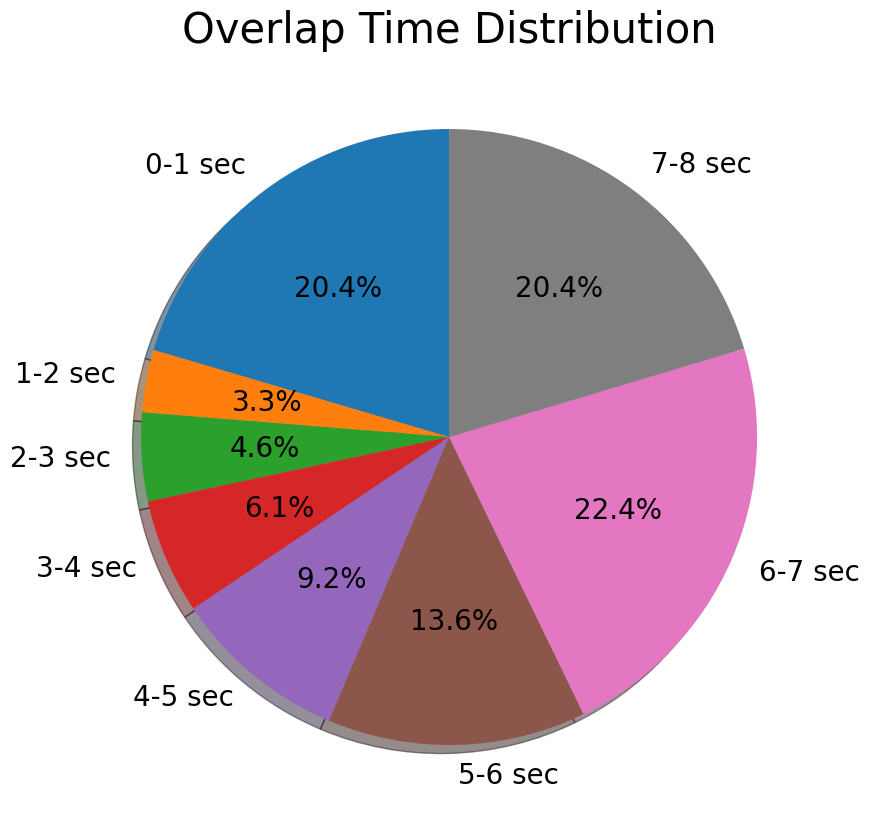

In [15]:

def visualize_overlap_time_pie(overlap_time_list):
    labels = ['0-1 sec', '1-2 sec', '2-3 sec', '3-4 sec', '4-5 sec', '5-6 sec', '6-7 sec', '7-8 sec']
    counts = [get_overlap_time_in_range(overlap_time_list, 0, 1),
              get_overlap_time_in_range(overlap_time_list, 1, 2),
              get_overlap_time_in_range(overlap_time_list, 2, 3),
              get_overlap_time_in_range(overlap_time_list, 3, 4),
              get_overlap_time_in_range(overlap_time_list, 4, 5),
              get_overlap_time_in_range(overlap_time_list, 5, 6),
              get_overlap_time_in_range(overlap_time_list, 6, 7),
              get_overlap_time_in_range(overlap_time_list, 7, 8)]
    plt.figure(figsize=(10,10))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize':20})
    plt.title('Overlap Time Distribution',fontsize=30)
    plt.show()
    
overlap_time_list = overlap_time_all(lta_train["clips"])
visualize_overlap_time_pie(overlap_time_list)